In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.stats import kstest, ks_2samp, pearsonr


def plot_feature_stationary(feature_name, lw=3, figsize = (15, 10)):
    plt.figure(figsize = figsize)
    plt.plot(d_stationary[feature_name], linewidth = lw, color = "darkorange")
    anomaly_indices=np.argwhere(y_cat[:,0] == 1)[:,0]
    lb = np.min(d_stationary[feature_name])-0.1
    ub = np.abs(lb) + np.max(d_stationary[feature_name])+0.1
    plt.bar(x=anomaly_indices, height=ub, bottom = lb)
    plt.show()

def plot_feature(feature_name, lw=3, figsize = (15, 10)):
    plt.figure(figsize = figsize)
    plt.plot(d[feature_name], linewidth = lw, color = "darkorange")
    anomaly_indices=np.argwhere(y_cat[:,0] == 1)[:,0]
    lb = np.min(d[feature_name])-0.1
    ub = np.abs(lb) + np.max(d[feature_name])+0.1
    plt.bar(x=anomaly_indices, height=ub, bottom = lb)
    plt.show()

In [2]:
mat = scipy.io.loadmat('EWS.mat')
names = list(mat.keys())[3:-2]
y = mat["Y"]
y_cat = np.zeros_like(y, dtype = int)
y_cat[y[:,0]==1.0,0] = 1
col = []
times = np.arange(y.shape[0])
for ipsilon in y:
    if ipsilon == 1.0:
        col.append("red")
    else:
        col.append("blue")
d = {}
for i, name in enumerate(names):
    if name != "None":
        d[name] = mat[names[i]]


In [3]:
Indices_Currencies = ["XAUBGNL", "BDIY", "CRY", "Cl1", "DXY", "EMUSTRUU", "GBP", "JPY", "LF94TRUU", "LF98TRUU", "LG30TRUU", "LMBITR", "LP01TREU", "LUACTRUU", "LUMSTRUU", "MXBR", "MXCN", "MXEU", "MXIN", "MXJP", "MXRU", "MXUS", "VIX"]

InterestRates = ["EONIA", "GTDEM10Y", "GTDEM2Y", "GTDEM30Y", "GTGBP20Y", "GTGBP2Y", "GTGBP30Y", "GTITL10YR", "GTITL2YR", "GTITL30YR", "GTJPY10YR", "GTJPY2YR", "GTJPY30YR", "US0001M", "USGG3M", "USGG2YR", "GT10", "USGG30YR"]

response_cat = y_cat[1:, 0]
response = y[1:, 0]

d_stationary = {}
for feature_name in list(d.keys()):
    if feature_name in Indices_Currencies:
        temp = np.log(d[feature_name])
        d_stationary[feature_name] = temp[1:] - temp[:-1]
        # d_stationary[feature_name] = np.log(d[feature_name][1:] / d[feature_name][1:])
    elif feature_name == "ECSURPUS":
        d_stationary[feature_name] = d[feature_name][1:]
    elif feature_name in InterestRates:
        d_stationary[feature_name] = d[feature_name][1:] - d[feature_name][:-1]


Augmented dickey fuller test for stationarity and Komogorov Smirnov test for equality in distribution 

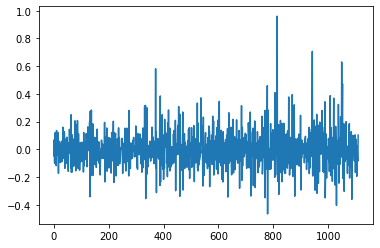

In [4]:
# plt.plot( np.log(d["VIX"][1:] / d["VIX"][1:]))
plt.plot(d_stationary["VIX"])
plt.show()

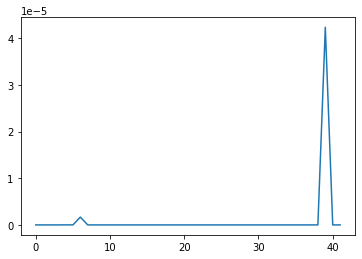

In [5]:
adf_pvalues = {}
for feature_name in list(d_stationary.keys()):
    temp = adfuller(list(d_stationary[feature_name]))
    adf_pvalues[feature_name] = temp[1]
    
# chech if stationarity has been obtained
plt.plot(list(adf_pvalues.values()))
plt.show()

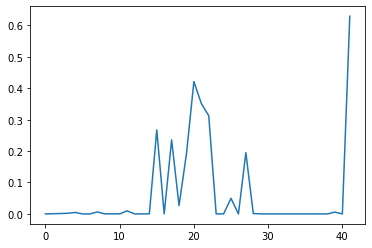

In [6]:
ks_pvalues = {}
for feature_name in list(d_stationary.keys()):
    datum = d_stationary[feature_name]
    # list(np.argwhere(y_cat[:,0] == 0).reshape(-1,))
    datum_0 = datum[np.argwhere(y_cat[1:,0] == 0),:].reshape(-1,)
    datum_1 = datum[np.argwhere(y_cat[1:,0] == 1),:].reshape(-1,)
    temp = ks_2samp(datum_0, datum_1)
    ks_pvalues[feature_name] = temp[1]

plt.plot(list(ks_pvalues.values()))
plt.show()

In [7]:
high_pval = np.argwhere(np.array(list(ks_pvalues.values())) > 0.05)
names_array = np.array(list(ks_pvalues.keys()))
names_array[high_pval]

array([['GTITL10YR'],
       ['GTITL30YR'],
       ['GTJPY2YR'],
       ['GTJPY30YR'],
       ['JPY'],
       ['LF94TRUU'],
       ['LUACTRUU'],
       ['XAUBGNL']], dtype='<U9')

plot di oro stazionario e non stazionario colorato rispetto a anomalia o no

In [8]:
ks_pvalues.keys()

dict_keys(['BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL'])

plottando il valore dell'oro stazionario sembra che sia importante solo all'inizissimo di un periodo blu, ma il range non è molto diverso nel tempo

ora togliamo:
```
                     array([['GTITL10YR'],
                            ['GTITL30YR'],
                            ['GTJPY2YR'],
                            ['GTJPY30YR'],
                            ['JPY'],
                            ['LF94TRUU'],
                            ['LUACTRUU'],
                            ['XAUBGNL']], dtype='<U9')
```
e inoltre togliamo gli indici che risultano più correlati tra di loro

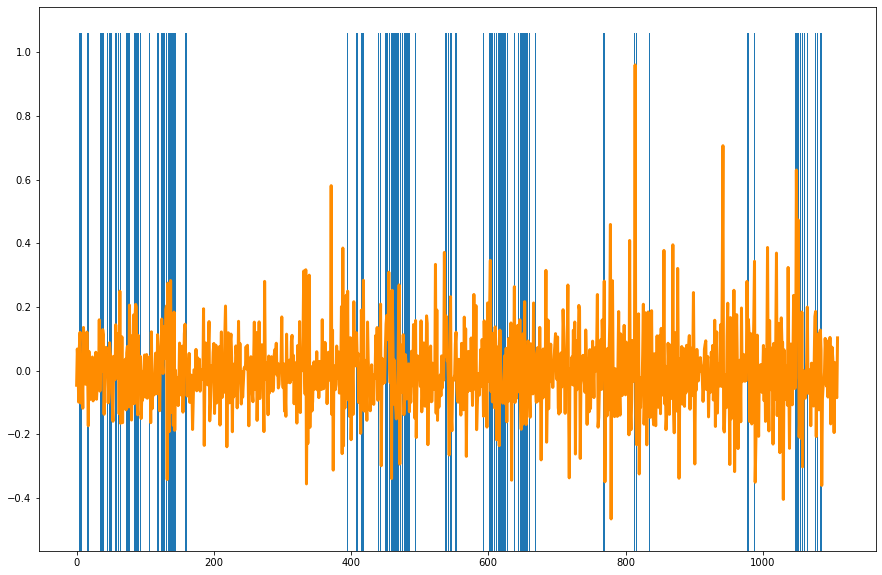

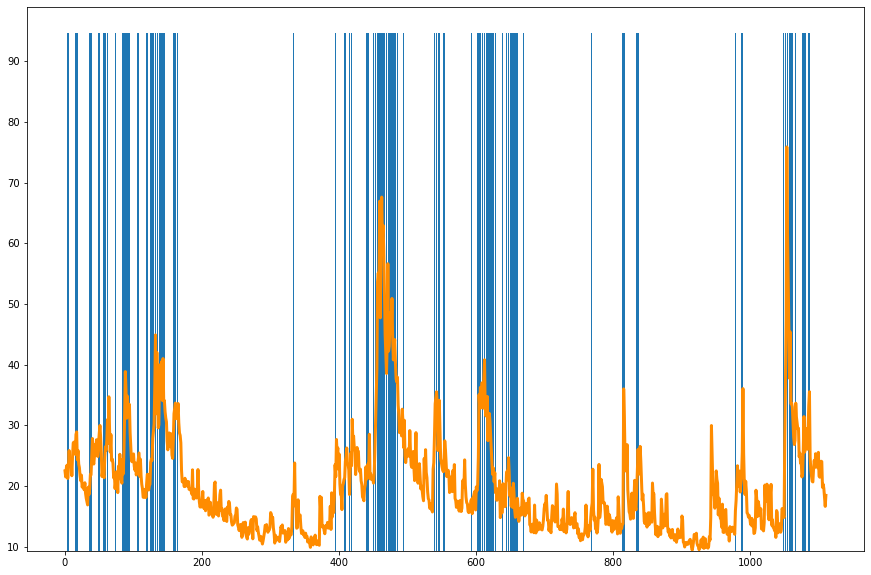

In [9]:
plot_feature_stationary("VIX", lw=3)
plot_feature("VIX", lw=3)

vediamo quali feature sono correlate